In [10]:
import numpy as np
import matplotlib.pyplot as plt

import illustris_python as il

In [18]:
cd /Users/festabu/TNG100-1/output/groups_099/

/Users/festabu/TNG100-1/output/groups_135


In [19]:
pwd

'/Users/festabu/TNG100-1/output/groups_99'

In [20]:
basePath = '/Users/festabu/TNG100-1/output'

In [21]:
fields = ['SubhaloMass','SubhaloSFRinRad']

In [77]:
subhalos = il.groupcat.loadSubhalos(basePath,99,fields=fields)

In [24]:
subhalos

{'count': 4371211,
 'SubhaloMass': array([2.7477936e+04, 3.6666228e+03, 7.7345551e+02, ..., 1.5167229e-02,
        1.4661655e-02, 1.4156080e-02], dtype=float32),
 'SubhaloSFRinRad': array([0.19582452, 0.08808479, 5.2942147 , ..., 0.        , 0.        ,
        0.        ], dtype=float32)}

In [25]:
fields2 = ['SubhaloHalfmassRadType','SubhaloMassInRadType']

In [26]:
subhalos2 = il.groupcat.loadSubhalos(basePath,99,fields=fields2)

In [27]:
subhalos.keys()

dict_keys(['count', 'SubhaloMass', 'SubhaloSFRinRad'])

In [28]:
subhalos2['SubhaloMassInRadType'].shape

(4371211, 6)

### Mass vs SFR Plot

In [29]:
mass_msun = subhalos['SubhaloMass'] * 1e10 / 0.704

Text(0, 0.5, 'Star Formation Rate [$M_\\odot / yr$]')

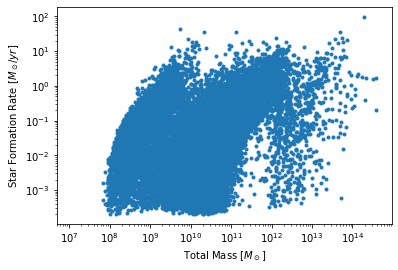

In [30]:
plt.plot(mass_msun,subhalos['SubhaloSFRinRad'],'.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Total Mass [$M_\odot$]')
plt.ylabel('Star Formation Rate [$M_\odot / yr$]')

### Mass vs Size

In [31]:
subhalos2.keys()

dict_keys(['count', 'SubhaloHalfmassRadType', 'SubhaloMassInRadType'])

In [32]:
subhalos2['SubhaloHalfmassRadType']

array([[627.3106   , 610.31036  ,   0.       ,   0.       ,  47.388058 ,
          0.       ],
       [368.52603  , 291.9038   ,   0.       ,   0.       ,  17.01238  ,
          0.       ],
       [ 49.645374 ,  82.63892  ,   0.       ,   0.       ,  14.983969 ,
          0.       ],
       ...,
       [  0.       ,   2.2495959,   0.       ,   0.       ,   0.       ,
          0.       ],
       [  0.       ,   3.8835316,   0.       ,   0.       ,   0.       ,
          0.       ],
       [  0.       ,   6.6095586,   0.       ,   0.       ,   0.       ,
          0.       ]], dtype=float32)

In [33]:
# For SubhaloHalfmassRadType, choose columns 0 and 4 bc they correspond to GAS and STARS & WIND particles, respectively
#subhalos2['SubhaloHalfmassRadType'][:,[0,4]]
subhalos2['SubhaloHalfmassRadType'][:,4] # only stellar mass contributing to the galaxy mass 

array([47.388058, 17.01238 , 14.983969, ...,  0.      ,  0.      ,
        0.      ], dtype=float32)

In [34]:
subhalos2['SubhaloHalfmassRadType'][:,4].shape

(4371211,)

In [35]:
# define galaxy size
galaxy_size=subhalos2['SubhaloHalfmassRadType'][:,4]

In [36]:
galaxy_size

array([47.388058, 17.01238 , 14.983969, ...,  0.      ,  0.      ,
        0.      ], dtype=float32)

In [37]:
galaxy_size=galaxy_size/0.7 # divide by h=0.7

In [38]:
galaxy_size

array([67.69723 , 24.303402, 21.40567 , ...,  0.      ,  0.      ,
        0.      ], dtype=float32)

In [39]:
# galaxy mass
subhalos2['SubhaloMassInRadType']

array([[8.01218872e+01, 1.30521240e+03, 0.00000000e+00, 0.00000000e+00,
        1.63834213e+02, 6.98100448e-01],
       [1.07298613e+00, 1.21830765e+02, 0.00000000e+00, 0.00000000e+00,
        2.57310143e+01, 1.25566334e-01],
       [2.82840753e+00, 1.08587250e+02, 0.00000000e+00, 0.00000000e+00,
        2.88526783e+01, 1.77487046e-01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]], dtype=float32)

In [40]:
# define galaxy mass as only the stellar component
galaxy_mass=subhalos2['SubhaloMassInRadType'][:,4]

In [41]:
galaxy_mass

array([163.83421 ,  25.731014,  28.852678, ...,   0.      ,   0.      ,
         0.      ], dtype=float32)

In [42]:
galaxy_mass=galaxy_mass/0.7 # divide by h=0.7

In [43]:
galaxy_mass

array([234.04887 ,  36.75859 ,  41.218113, ...,   0.      ,   0.      ,
         0.      ], dtype=float32)

In [44]:
galaxy_mass=galaxy_mass*1e10 # multiply galaxy mass by 1e10

In [45]:
galaxy_mass

array([2.3404887e+12, 3.6758592e+11, 4.1218114e+11, ..., 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00], dtype=float32)

### Scatter plot

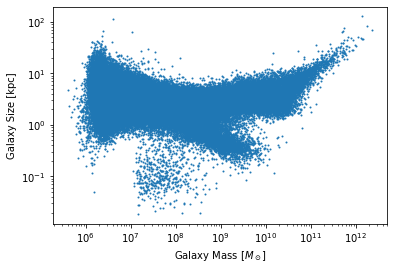

In [46]:
plt.plot(galaxy_mass,galaxy_size, '.', markersize=2)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Galaxy Size [kpc]')
plt.xlabel('Galaxy Mass [$ M_\odot $]')
#plt.savefig("Mass_vs_Size_updated_v2.jpeg", dpi=500)
plt.show()

### Logscale of size and mass entries

In [47]:
with np.errstate(divide='ignore'):
    galaxy_mass_log = np.where(galaxy_mass>0, np.log10(galaxy_mass), 0)
    galaxy_size_log = np.where(galaxy_size>0, np.log10(galaxy_size), 0)

mask_non_zero = galaxy_mass_log>0
galaxy_mass_log = galaxy_mass_log[mask_non_zero]
galaxy_size_log = galaxy_size_log[mask_non_zero]

# np.count_nonzero(galaxy_size)

In [48]:
zero_mass = galaxy_mass==0
zero_size = galaxy_size==0

In [49]:
np.sum(zero_mass == zero_size)  ## check if non-zero entries in the size and mass arrays match each other

4371211

In [50]:
mask_non_zero

array([ True,  True,  True, ..., False, False, False])

In [51]:
galaxy_mass_log

array([12.369307 , 11.565359 , 11.615088 , ...,  6.136387 ,  6.2803073,
        6.3790245], dtype=float32)

In [52]:
galaxy_size.shape

(4371211,)

In [53]:
galaxy_size_log.shape

(212929,)

In [54]:
np.count_nonzero(galaxy_size_log)

212929

Text(0, 0.5, 'Counts')

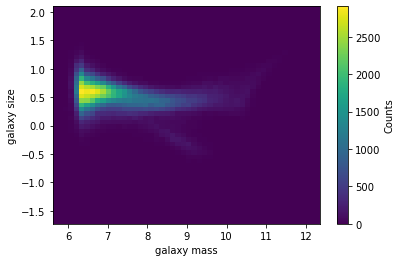

In [55]:
fig3 = plt.figure()
plt.hist2d(galaxy_mass_log,galaxy_size_log, bins=50)
plt.xlabel('galaxy mass')
plt.ylabel('galaxy size')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Counts')

### 2D Histogram 

##### 2d Histogram function vs Matplotlib hist2d

In [56]:
def hist2dplot(axis,x,y,fill=True,**kwargs):
    
    h,xed,yed=np.histogram2d(x,y)
    
    
    h=np.transpose(h)
    total=h.sum()
    h=h/total
    hflat=np.sort(np.reshape(h,-1)) #makes 1D and sorted 
    csum=np.cumsum(hflat)
    values=1.0-np.array([0.9973,0.9545,0.6827,0.0])
    
    levels=[]
    
    for val in values:
        idx = (np.abs(csum - val)).argmin()
        levels.append(hflat[idx])

    if fill:
        colors=['#f7f7f7','#cccccc','#969696','#525252'] #gray
#        colors=['#ffffcc','#c2e699','#78c679','#238443'] #green 
        axis.contourf(h,levels,colors=colors,extent=[xed[0],xed[-1],yed[0],yed[-1]])
    else:
        colors=['#fdcc8a','#fc8d59','#d7301f']
        axis.contour(h,levels,colors=colors,extent=[xed[0],xed[-1],yed[0],yed[-1]])
    
    

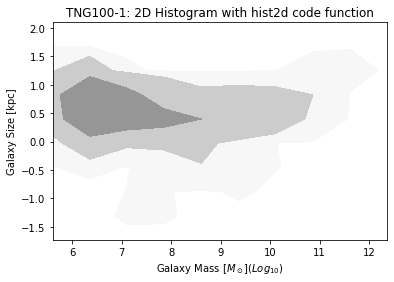

In [74]:
# Figure using the 2D Histogram function

fig2, ax =plt.subplots()
#axis=fig2.add_subplot()
hist2dplot(ax, galaxy_mass_log, galaxy_size_log, fill=True, bins=1000)
plt.title('TNG100-1: 2D Histogram with hist2d code function')
plt.ylabel('Galaxy Size [kpc]')
plt.xlabel('Galaxy Mass [$ M_\odot $]($ Log_{10} $)')
#plt.savefig("TNG1001_GalaxyStellarMass_vs_Size_hist2Dplot_v1.jpeg", dpi=500)

In [58]:
ax

<AxesSubplot:title={'center':'TNG100-1: 2D Histogram with hist2d code function'}, xlabel='Galaxy Mass [$ M_\\odot $]($ Log_{10} $)', ylabel='Galaxy Size [kpc]'>

Text(0.5, 0, 'Galaxy Mass [$ M_\\odot $]($ Log_{10} $)')

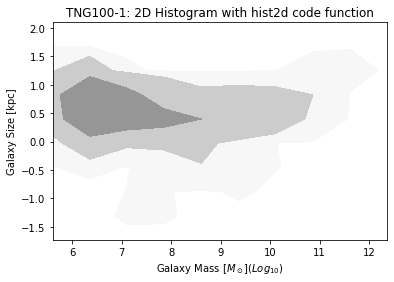

In [59]:
# Figure using the 2D Histogram function where histogram range is defined

fig2, ax =plt.subplots()
#axis=fig2.add_subplot()
hist2dplot(ax, galaxy_mass_log, galaxy_size_log, fill=True, bins=10, range=[[8,11],[0.4,1.4]])
plt.title('TNG100-1: 2D Histogram with hist2d code function')
plt.ylabel('Galaxy Size [kpc]')
plt.xlabel('Galaxy Mass [$ M_\odot $]($ Log_{10} $)')
#plt.savefig("TNG1001_GalaxyStellarMass_vs_Size_hist2Dplot_v2.jpeg", dpi=500)

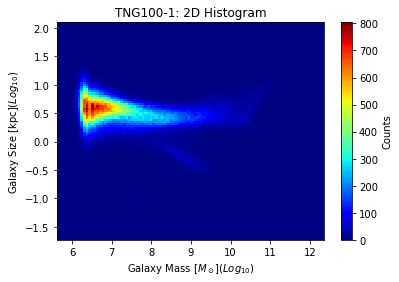

In [68]:
# Figure using the Matplotlib hist2d

plt.hist2d(galaxy_mass_log, galaxy_size_log, cmap = plt.cm.jet, bins=100)
plt.title('TNG100-1: 2D Histogram')
plt.ylabel('Galaxy Size [kpc]($ Log_{10} $)')
plt.xlabel('Galaxy Mass [$ M_\odot $]($ Log_{10} $)')
cbar2 = plt.colorbar()
cbar2.ax.set_ylabel('Counts')
#plt.savefig("TNG1001_GalaxyStellarMass_vs_Size_Hist2D_v1.jpeg", dpi=500)
plt.show()

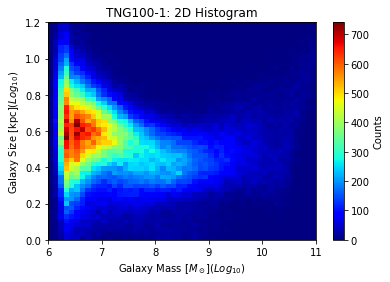

In [69]:
# Figure using the Matplotlib hist2d where histogram range is defined

plt.hist2d(galaxy_mass_log, galaxy_size_log, cmap = plt.cm.jet, bins=50,  range=[[6,11],[0.0,1.2]]  )
plt.title('TNG100-1: 2D Histogram')
plt.ylabel('Galaxy Size [kpc]($ Log_{10} $)')
plt.xlabel('Galaxy Mass [$ M_\odot $]($ Log_{10} $)')
cbar2 = plt.colorbar()
cbar2.ax.set_ylabel('Counts')
#plt.savefig("TNG1001_GalaxyStellarMass_vs_Size_Hist2D_v2.jpeg", dpi=500)
plt.show()

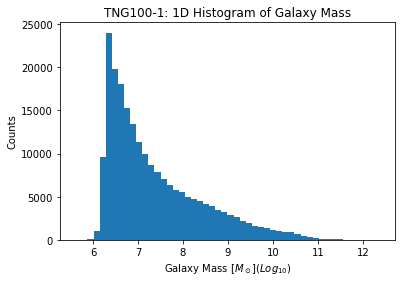

In [70]:
plt.hist(galaxy_mass_log,bins=50)
plt.title('TNG100-1: 1D Histogram of Galaxy Mass')
plt.ylabel('Counts')
plt.xlabel('Galaxy Mass [$ M_\odot $]($ Log_{10} $)')
#plt.savefig("TNG1001_GalaxyStellarMass_Hist1D.jpeg", dpi=500)
plt.show()

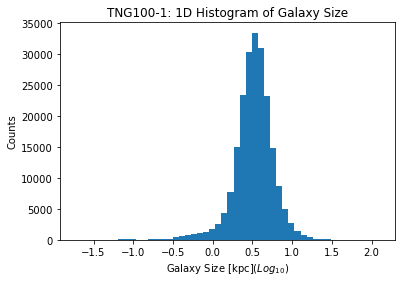

In [71]:
plt.hist(galaxy_size_log,bins=50)
plt.title('TNG100-1: 1D Histogram of Galaxy Size')
plt.ylabel('Counts')
plt.xlabel('Galaxy Size [kpc]($ Log_{10} $)')
#plt.savefig("TNG1001_GalaxySize_Hist1D.jpeg", dpi=500)
plt.show()

### Scatter plot logarithmic scale

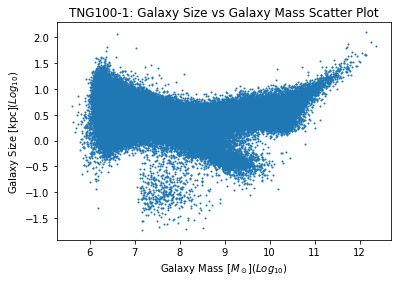

In [72]:
plt.plot(galaxy_mass_log,galaxy_size_log, '.', markersize=2)
plt.title('TNG100-1: Galaxy Size vs Galaxy Mass Scatter Plot')
#plt.xscale('log')
#plt.yscale('log')
plt.ylabel('Galaxy Size [kpc]($ Log_{10} $)')
plt.xlabel('Galaxy Mass [$ M_\odot $]($ Log_{10} $)')
#plt.savefig("TNG1001_GalaxyStellarMass_vs_Size_scatter_v1.jpeg", dpi=500)
plt.show()

### Histogram 2D and Scatter Plot overlap

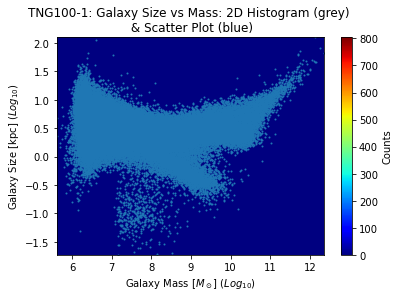

In [65]:
fig2, ax =plt.subplots()
#axis=fig2.add_subplot()
#hist2dplot(ax, galaxy_mass_log, galaxy_size_log, fill=True)
plt.hist2d(galaxy_mass_log, galaxy_size_log, cmap = plt.cm.jet, bins=100)
cbar2 = plt.colorbar()
cbar2.ax.set_ylabel('Counts')
plt.title('TNG100-1: Galaxy Size vs Mass: 2D Histogram (grey) \n & Scatter Plot (blue)')
plt.plot(galaxy_mass_log,galaxy_size_log, '.', markersize=2)
#plt.xscale('log')
#plt.yscale('log')
plt.ylabel('Galaxy Size [kpc] ($ Log_{10} $)')
plt.xlabel('Galaxy Mass [$ M_\odot $] ($ Log_{10} $)')
#plt.savefig("TNG1001_GalaxyStellarMass_vs_Size_hist2d_and_scatterplot.jpeg", dpi=500)
plt.show()

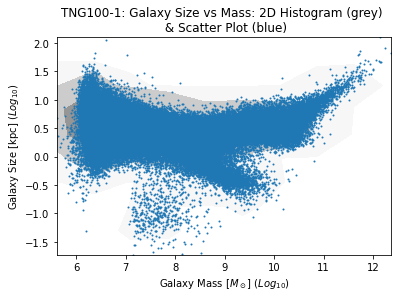

In [73]:
fig2, ax =plt.subplots()
#axis=fig2.add_subplot()
hist2dplot(ax, galaxy_mass_log, galaxy_size_log, fill=True)
plt.title('TNG100-1: Galaxy Size vs Mass: 2D Histogram (grey) \n & Scatter Plot (blue)')
plt.plot(galaxy_mass_log,galaxy_size_log, '.', markersize=2)
#plt.xscale('log')
#plt.yscale('log')
plt.ylabel('Galaxy Size [kpc] ($ Log_{10} $)')
plt.xlabel('Galaxy Mass [$ M_\odot $] ($ Log_{10} $)')
#plt.savefig("TNG1001_GalaxyStellarMass_vs_Size_hist2d_and_scatterplot.jpeg", dpi=500)
plt.show()

### Central galaxies vs satellites

In [67]:
il.groupcat.loadSubhalos(basePath, 99).keys()

dict_keys(['count', 'SubhaloBHMass', 'SubhaloBHMdot', 'SubhaloBfldDisk', 'SubhaloBfldHalo', 'SubhaloCM', 'SubhaloFlag', 'SubhaloGasMetalFractions', 'SubhaloGasMetalFractionsHalfRad', 'SubhaloGasMetalFractionsMaxRad', 'SubhaloGasMetalFractionsSfr', 'SubhaloGasMetalFractionsSfrWeighted', 'SubhaloGasMetallicity', 'SubhaloGasMetallicityHalfRad', 'SubhaloGasMetallicityMaxRad', 'SubhaloGasMetallicitySfr', 'SubhaloGasMetallicitySfrWeighted', 'SubhaloGrNr', 'SubhaloHalfmassRad', 'SubhaloHalfmassRadType', 'SubhaloIDMostbound', 'SubhaloLen', 'SubhaloLenType', 'SubhaloMass', 'SubhaloMassInHalfRad', 'SubhaloMassInHalfRadType', 'SubhaloMassInMaxRad', 'SubhaloMassInMaxRadType', 'SubhaloMassInRad', 'SubhaloMassInRadType', 'SubhaloMassType', 'SubhaloParent', 'SubhaloPos', 'SubhaloSFR', 'SubhaloSFRinHalfRad', 'SubhaloSFRinMaxRad', 'SubhaloSFRinRad', 'SubhaloSpin', 'SubhaloStarMetalFractions', 'SubhaloStarMetalFractionsHalfRad', 'SubhaloStarMetalFractionsMaxRad', 'SubhaloStarMetallicity', 'SubhaloStarMe

In [75]:
fields3 = ['SubhaloFlag']

In [78]:
subhalos3 = il.groupcat.loadSubhalos(basePath,99,fields=fields3)

In [79]:
subhalos3

array([ True,  True,  True, ...,  True,  True,  True])

In [83]:
central_galaxies=subhalos3[True]=1

In [84]:
satellite_galaxies=subhalos3[False]=0

In [85]:
np.count_nonzero(central_galaxies)

1

In [91]:
subhalos3[True]

array([[ True,  True,  True, ...,  True,  True,  True]])

In [92]:
subhalos3[True].shape

(1, 4371211)

In [88]:
subhalos3.shape

(4371211,)

In [94]:
subhalos3[False]

array([], shape=(0, 4371211), dtype=bool)